# **MOVIE_DATA_ANALYSIS🎥🎬🎞️🍿**

## **과제 2️⃣**
### 영화 평점과 흥행 수익 간의 상관관계 분석 

#### 사용자 평점, 비평가 평점, 박스오피스 수익 간의 관계를 분석하고, 평점이 높지만 흥행하지 못한 영화와 평점은 낮지만 흥행한 영화들의 특성을 비교 분석하세요.

#### **1. 상관관계 분석 및 산점도 시각화:**

상관관계 분석
상관관계 분석은 두 변수 사이의 선형 관계 강도를 정량적으로 나타내는 데 사용됨.

평점(vote_average)과 흥행 수익(revenue) 두 변수 간의 관계를 산점도(scatter plot)로 그려보기.
x축을 평점, y축을 수익으로 두면 평점이 높을수록 수익이 높아지는 경향을 시각적으로 확인 가능.

- 데이터 정제: vote_average, vote_average_naver, critic_average, revenue, audience_total 열에 누락된 값이 있는지 확인하고, 필요시 해당 행을 제거하거나 대체해야 합니다.
- 상관관계 계산: 사용자 평점(vote_average 또는 vote_average_naver)과 비평가 평점(critic_average), 그리고 흥행 수익(revenue 또는 audience_total) 간의 피어슨 상관계수를 계산합니다. 이는 두 변수가 얼마나 강한 선형 관계를 가지는지 보여줍니다.
- 시각화: vote_average와 revenue를 각각 x, y축으로 하는 산점도를 그려 시각적으로 상관관계를 확인합니다. 비평가 평점과 흥행 수익에 대해서도 같은 작업을 반복합니다.

In [5]:
import pandas as pd
from IPython.display import display

# 파일 경로 및 청크 사이즈 설정
file_path = './data/processed/kobis_weekly_final.csv'
chunk_size = 10000  # 한 번에 처리할 행의 수 (필요에 따라 조절 가능)

# 상관관계 계산을 위한 리스트 초기화
df_chunks = []

# 1. 데이터를 청크 단위로 불러와 처리
try:
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # 필요한 열만 선택
        analysis_chunk = chunk[['vote_average_naver', 'critic_average', 'revenue', 'audience_total']].copy()
        # 결측값 제거
        analysis_chunk.dropna(inplace=True)
        # 처리된 청크를 리스트에 추가
        df_chunks.append(analysis_chunk)
except FileNotFoundError:
    print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
    exit()
except Exception as e:
    print(f"파일을 불러오는 중 오류가 발생했습니다: {e}")
    exit()

# 모든 청크를 하나로 합치기
if not df_chunks:
    print("오류: 처리할 데이터가 없습니다.")
    exit()

analysis_df = pd.concat(df_chunks, ignore_index=True)

# 2. 상관관계 분석
correlation_matrix = analysis_df.corr()

print("\n---")
print("변수 간 상관관계 행렬:")
# display()를 사용하여 데이터프레임을 더 보기 좋게 출력
display(correlation_matrix)

# 3. 결과 해석
print("\n---")
print("상관관계 분석 결과 해석:")
print(f"1. 사용자 평점(vote_average_naver)과 흥행 수익(revenue)의 상관계수: {correlation_matrix.loc['vote_average_naver', 'revenue']:.4f}")
print(f"2. 비평가 평점(critic_average)과 흥행 수익(revenue)의 상관계수: {correlation_matrix.loc['critic_average', 'revenue']:.4f}")
print(f"3. 사용자 평점(vote_average_naver)과 비평가 평점(critic_average)의 상관계수: {correlation_matrix.loc['vote_average_naver', 'critic_average']:.4f}")


---
변수 간 상관관계 행렬:


,vote_average_naver,critic_average,revenue,audience_total
vote_average_naver,1.000000,0.369636,0.221442,0.233052
critic_average,0.369636,1.000000,0.197014,0.196882
revenue,0.221442,0.197014,1.000000,0.994792
audience_total,0.233052,0.196882,0.994792,1.000000



---
상관관계 분석 결과 해석:
1. 사용자 평점(vote_average_naver)과 흥행 수익(revenue)의 상관계수: 0.2214
2. 비평가 평점(critic_average)과 흥행 수익(revenue)의 상관계수: 0.1970
3. 사용자 평점(vote_average_naver)과 비평가 평점(critic_average)의 상관계수: 0.3696


총 927개 행 중 835개 행을 사용하여 분석을 진행합니다.


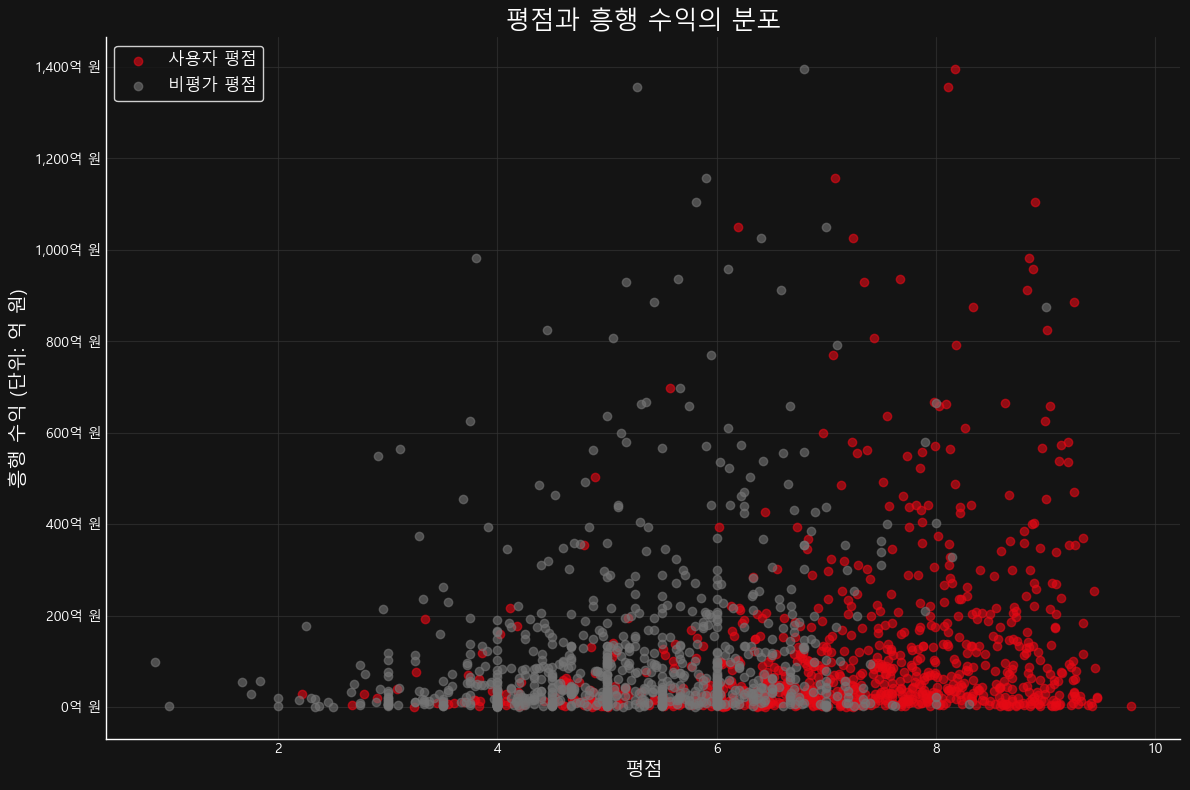

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 경고 메시지를 무시합니다.
warnings.filterwarnings('ignore', category=UserWarning)

# Netflix 스타일 설정
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 사용자
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# Netflix 색상 팔레트 정의
netflix_red = '#e50914'
netflix_dark = '#141414'
netflix_gray = '#757575'
netflix_light_gray = '#b3b3b3'
netflix_dark_gray = '#333333'

# 파일 경로 및 메모리 효율을 위한 청크 사이즈를 설정합니다.
file_path = './data/processed/kobis_weekly_final.csv'
chunk_size = 10000

# 데이터를 청크(chunk) 단위로 불러옵니다.
df_chunks = []
try:
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        df_chunks.append(chunk)
except FileNotFoundError:
    print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
    exit()

# 불러온 모든 청크를 하나의 데이터프레임으로 합칩니다.
df = pd.concat(df_chunks, ignore_index=True)

# 분석에 필요한 열만 선택하고 결측값을 제거합니다.
analysis_df = df[['vote_average_naver', 'critic_average', 'revenue']].copy()
analysis_df.dropna(inplace=True)
print(f"총 {len(df)}개 행 중 {len(analysis_df)}개 행을 사용하여 분석을 진행합니다.")


# y축 단위를 억 원으로 변경하는 포매터 함수 정의
def y_formatter(y, pos):
    return f'{y/1e8:,.0f}억 원'


# 하나의 figure에 두 개의 산점도를 겹쳐서 표시합니다.
fig, ax = plt.subplots(figsize=(12, 8), facecolor=netflix_dark)

# 첫 번째 산점도: 사용자 평점 vs. 흥행 수익 (빨간색)
ax.scatter(x=analysis_df['vote_average_naver'], 
           y=analysis_df['revenue'], 
           alpha=0.6,
           c=netflix_red, 
           label='사용자 평점')

# 두 번째 산점도: 비평가 평점 vs. 흥행 수익 (회색)
ax.scatter(x=analysis_df['critic_average'], 
           y=analysis_df['revenue'], 
           alpha=0.6,
           c=netflix_gray, 
           label='비평가 평점')

# 그래프 제목 및 축 라벨 설정
ax.set_title('평점과 흥행 수익의 분포', fontsize=18, color='white')
ax.set_xlabel('평점', fontsize=14, color='white')
ax.set_ylabel('흥행 수익 (단위: 억 원)', fontsize=14, color='white')

# y축 포맷터 적용
ax.yaxis.set_major_formatter(FuncFormatter(y_formatter))

# 그래프 스타일링
ax.grid(True, color=netflix_dark_gray, alpha=0.7)
ax.tick_params(colors='white')
ax.set_facecolor(netflix_dark)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 범례를 박스 형태로 표시
legend = ax.legend(frameon=True, fontsize=12, loc='upper left',
                   facecolor=netflix_dark, edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')

# 그래프 레이아웃 조정 및 배경색 설정
plt.tight_layout()
fig.patch.set_facecolor(netflix_dark)
plt.show()


---

## 고흥행&저평점 | 저흥행&고평점 그룹별 특성 분석
- 그룹별 제작사, 장르, 개봉 월 빈도수 및 비율 분석

In [24]:
import pandas as pd
import numpy as np
import warnings
import ast
from collections import Counter
from IPython.display import display, HTML

# 경고 메시지를 무시합니다.
warnings.filterwarnings('ignore', category=UserWarning)

# =========================
# 0) 데이터 로드 및 전처리
# =========================
file_path = './data/processed/kobis_weekly_final.csv'
df = pd.read_csv(file_path)

# 분석에 필요한 열 선택 및 결측값 처리
analysis_df = df[['title', 'release_month', 'revenue', 'vote_average', 'genres', 'director_name_ko', 'cast_names_ko', 'production_companies']].copy()
analysis_df.dropna(subset=['revenue', 'vote_average', 'release_month'], inplace=True)

# 'genres' 열의 문자열을 리스트로 변환
analysis_df['genres'] = analysis_df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# '|' 구분자로 나뉜 열들을 리스트로 변환
analysis_df['director_name_ko'] = analysis_df['director_name_ko'].apply(lambda x: [d.strip() for d in str(x).split('|') if d.strip()])
analysis_df['cast_names_ko'] = analysis_df['cast_names_ko'].apply(lambda x: [c.strip() for c in str(x).split('|') if c.strip()])

# 'production_companies' 열의 문자열을 리스트로 변환하고 모든 제작사 이름 추출
def get_all_company_names_list(companies_str):
    company_names = []
    try:
        companies_list = ast.literal_eval(companies_str)
        if companies_list and isinstance(companies_list, list):
            for item in companies_list:
                if isinstance(item, dict):
                    name = item.get('companyNm')
                    if name:
                        company_names.append(name)
                elif isinstance(item, str):
                    company_names.append(item)
    except (ValueError, SyntaxError):
        pass
    return company_names

analysis_df['제작사_리스트'] = analysis_df['production_companies'].apply(get_all_company_names_list)

# 분석용 '제작사' 열도 추가 (표시용)
analysis_df['제작사'] = analysis_df['제작사_리스트'].apply(lambda x: ", ".join(x) if x else '알 수 없음')


# =========================
# 1) 기준 설정 및 영화 분류
# =========================
# 수익 기준 (고흥행/저흥행)
revenue_high_threshold = analysis_df['revenue'].quantile(0.70)
revenue_low_threshold = analysis_df['revenue'].quantile(0.30)

# 평점 기준 (ntile 3 등급)
analysis_df['rating_ntile'] = pd.qcut(analysis_df['vote_average'], 3, labels=False, duplicates='drop')

# 영화를 그룹으로 분류
def classify_movie_revised(row):
    is_high_revenue = row['revenue'] >= revenue_high_threshold
    is_low_revenue = row['revenue'] <= revenue_low_threshold
    is_high_rating = row['rating_ntile'] == 2
    is_low_rating = row['rating_ntile'] == 0
    
    if is_high_revenue and is_low_rating:
        return '저평점 & 고흥행'
    elif is_low_revenue and is_high_rating:
        return '고평점 & 저흥행'
    else:
        return '기타'

analysis_df['group'] = analysis_df.apply(classify_movie_revised, axis=1)

# =========================
# 2) 그룹별 데이터프레임 추출
# =========================
low_rating_high_revenue_df = analysis_df[analysis_df['group'] == '저평점 & 고흥행']
high_rating_low_revenue_df = analysis_df[analysis_df['group'] == '고평점 & 저흥행']

# HTML 스타일 설정 (모든 결과물에 적용)
html_style = """
<style>
    .dataframe {
        font-family: Arial, sans-serif;
        border-collapse: collapse;
        width: 100%;
        color: #333;
        background-color: #f9f9f9;
        margin-bottom: 30px;
    }
    .dataframe th, .dataframe td {
        border: 1px solid #ddd;
        padding: 8px;
        text-align: left;
        white-space: nowrap;
    }
    .dataframe th {
        background-color: #e5e5e5;
    }
    .dataframe tbody tr:nth-child(odd) {
        background-color: #f2f2f2;
    }
    h3 {
        color: #333;
        border-bottom: 2px solid #e5e5e5;
        padding-bottom: 5px;
        margin-top: 30px;
    }
    h4 {
        color: #555;
        font-size: 1.1em;
        margin-top: 20px;
        margin-bottom: 10px;
        border-left: 4px solid #e5e5e5;
        padding-left: 10px;
    }
</style>
"""
display(HTML(html_style))

# =========================
# 3) 그룹별 영화 리스트 및 총 영화 수 출력
# =========================
print("\n--- 영화 그룹별 리스트 길이 ---")
low_rating_high_revenue_count = len(low_rating_high_revenue_df)
high_rating_low_revenue_count = len(high_rating_low_revenue_df)
print(f"저평점 & 고흥행 그룹의 영화 수: {low_rating_high_revenue_count}편")
print(f"고평점 & 저흥행 그룹의 영화 수: {high_rating_low_revenue_count}편")

display(HTML("<h3>⭐ 저평점 & 고흥행 그룹 영화 리스트</h3>"))
display(HTML(low_rating_high_revenue_df[['title', 'vote_average', 'revenue', '제작사']].to_html(index=False)))

display(HTML("<h3>⭐ 고평점 & 저흥행 그룹 영화 리스트</h3>"))
display(HTML(high_rating_low_revenue_df[['title', 'vote_average', 'revenue', '제작사']].to_html(index=False)))

# =========================
# 4) 그룹별 제작사 빈도수 및 비율 분석
# =========================
def analyze_companies_by_df_with_ratio(group_df, total_movies):
    all_companies = [company for sublist in group_df['제작사_리스트'] for company in sublist]
    company_counts = Counter(all_companies)
    df_counts = pd.DataFrame(company_counts.most_common(10), columns=['제작사', '빈도수'])
    df_counts['비율'] = (df_counts['빈도수'] / total_movies) * 100
    df_counts['비율'] = df_counts['비율'].round(2).astype(str) + '%'
    return df_counts

# 저평점 & 고흥행 그룹 제작사 빈도수 및 비율
df_low_high = analyze_companies_by_df_with_ratio(low_rating_high_revenue_df, low_rating_high_revenue_count)
# 고평점 & 저흥행 그룹 제작사 빈도수 및 비율
df_high_low = analyze_companies_by_df_with_ratio(high_rating_low_revenue_df, high_rating_low_revenue_count)

# 결과 출력 (HTML)
display(HTML("<h3>⭐ 저평점 & 고흥행 영화의 주요 제작사 (빈도수 및 비율 순)</h3>"))
display(HTML(df_low_high.to_html(index=False)))

display(HTML("<h3>⭐ 고평점 & 저흥행 영화의 주요 제작사 (빈도수 및 비율 순)</h3>"))
display(HTML(df_high_low.to_html(index=False)))

# =========================
# 5) 그룹별 장르 빈도수 및 비율 분석
# =========================
def analyze_genres_by_df_with_ratio(group_df, total_movies):
    all_genres = [genre for sublist in group_df['genres'] for genre in sublist]
    genre_counts = Counter(all_genres)
    df_counts = pd.DataFrame(genre_counts.most_common(10), columns=['장르', '빈도수'])
    df_counts['비율'] = (df_counts['빈도수'] / total_movies) * 100
    df_counts['비율'] = df_counts['비율'].round(2).astype(str) + '%'
    return df_counts

# 저평점 & 고흥행 그룹 장르 빈도수 및 비율
df_low_high_genre = analyze_genres_by_df_with_ratio(low_rating_high_revenue_df, low_rating_high_revenue_count)
# 고평점 & 저흥행 그룹 장르 빈도수 및 비율
df_high_low_genre = analyze_genres_by_df_with_ratio(high_rating_low_revenue_df, high_rating_low_revenue_count)

# 결과 출력 (HTML)
display(HTML("<h3>⭐ 저평점 & 고흥행 영화의 주요 장르 (빈도수 및 비율 순)</h3>"))
display(HTML(df_low_high_genre.to_html(index=False)))

display(HTML("<h3>⭐ 고평점 & 저흥행 영화의 주요 장르 (빈도수 및 비율 순)</h3>"))
display(HTML(df_high_low_genre.to_html(index=False)))

# =========================
# 6) 그룹별 개봉 월 빈도수 및 비율 분석
# =========================
def analyze_months_by_df_with_ratio(group_df, total_movies):
    all_months = group_df['release_month'].tolist()
    month_counts = Counter(all_months)
    df_counts = pd.DataFrame(month_counts.most_common(), columns=['개봉월', '빈도수'])
    df_counts['비율'] = (df_counts['빈도수'] / total_movies) * 100
    df_counts['비율'] = df_counts['비율'].round(2).astype(str) + '%'
    df_counts = df_counts.sort_values(by='개봉월', ascending=True)
    return df_counts

# 저평점 & 고흥행 그룹 개봉 월 빈도수 및 비율
df_low_high_month = analyze_months_by_df_with_ratio(low_rating_high_revenue_df, low_rating_high_revenue_count)
# 고평점 & 저흥행 그룹 개봉 월 빈도수 및 비율
df_high_low_month = analyze_months_by_df_with_ratio(high_rating_low_revenue_df, high_rating_low_revenue_count)

# 결과 출력 (HTML)
display(HTML("<h3>⭐ 저평점 & 고흥행 영화의 개봉 월 빈도수 및 비율</h3>"))
display(HTML(df_low_high_month.to_html(index=False)))

display(HTML("<h3>⭐ 고평점 & 저흥행 영화의 개봉 월 빈도수 및 비율</h3>"))
display(HTML(df_high_low_month.to_html(index=False)))



--- 영화 그룹별 리스트 길이 ---
저평점 & 고흥행 그룹의 영화 수: 54편
고평점 & 저흥행 그룹의 영화 수: 74편


title,vote_average,revenue,제작사
마파도,6.141,1.663338e+10,"코리아 엔터테인먼트, 씨제이엔터테인먼트, 씨제이엔터테인먼트, 무비클로저, 세방현상(주)"
가문의 위기,6.330,2.848571e+10,"(주)태원엔터테인먼트, (주)쇼박스, (주)쇼박스, (주)쇼박스, 세방현상(주), 플러스 액션 스턴트팀, (사)한국농아인협회, 한국시각장애인연합회"
작업의 정석,6.541,1.166038e+10,"영화사청어람(주), (주)쇼박스, 영화사청어람(주), (주)쇼박스, 영화사청어람(주), (주)케이티알파, (주)나인앤미디어, 무비클로저"
태풍,6.131,2.211469e+10,"씨제이엔터테인먼트, 씨제이엔터테인먼트, 씨제이엔터테인먼트, ㈜라이브톤, 세방현상(주), 빔필름 (엠버에이치엠 국내법인)"
투사부일체,3.271,3.147477e+10,"(주)시네마제니스 , 씨제이엔터테인먼트, 씨제이엔터테인먼트, (사)부산영상위원회"
한반도,6.371,2.037871e+10,"(주)시네마서비스글로벌, 씨제이엔터테인먼트, 씨제이엔터테인먼트, ㈜블루캡, 빔필름 (엠버에이치엠 국내법인), (사)한국농아인협회, 한국시각장애인연합회"
가문의 부활 - 가문의 영광3,4.021,1.593388e+10,"(주)태원엔터테인먼트, (주)쇼박스, (주)쇼박스, 보스톤 창업투자(주), (주)쇼박스, 플러스 액션 스턴트팀"
바람피기 좋은 날,5.811,1.068820e+10,"(주)아이필름홀딩스, (주)시네마서비스, (주)시네마서비스, (주)아이에이치큐, ㈜라이브톤, 데몰리션"
아내가 결혼했다,5.081,1.195201e+10,"(주)주피터필름, 씨제이엔터테인먼트, 소빅창업투자(주), 씨제이엔터테인먼트, 씨 47"
미인도,6.390,1.563091e+10,"㈜이룸영화사, (주)영화사참, 씨제이엔터테인먼트, 아시아문화기술투자(주), 씨제이엔터테인먼트, ㈜블루캡, 남양주종합촬영소(소품실), (주)케이제이네트"


title,vote_average,revenue,제작사
미스터 주부퀴즈왕,8.001,1972572000.0,"폴스타엔터테인먼트, (주)쇼박스, (주)쇼박스, (주)쇼박스, 세방현상(주), (사)한국농아인협회, 한국시각장애인연합회"
"사랑해, 말순씨",8.051,2034973500.0,"블루스톰(주), 쇼이스트(주), 쇼이스트(주), 엠라인디스트리뷰션(주), ㈜라이브톤"
가족의 탄생,8.591,1150594700.0,"블루스톰(주), 롯데쇼핑㈜롯데엔터테인먼트, 롯데쇼핑㈜롯데엔터테인먼트, 블루스톰(주), 롯데쇼핑㈜롯데엔터테인먼트, 서울현상소"
국경의 남쪽,8.491,1424212800.0,"(주)싸이더스, 씨제이엔터테인먼트, 씨제이엔터테인먼트, ㈜라이브톤, 창고사람들, 세방현상(주)"
파이스토리,8.691,1286008500.0,"(주)에펙스디지탈, 원더월드 LLC, ㈜디지아트프로덕션, 씨제이엔터테인먼트, 소빅창업투자(주), 벨벳 옥토퍼스, 세방현상(주)"
그해 여름,8.961,1647540600.0,"케이엠컬쳐㈜, (주)쇼박스, (주)쇼박스, (주)케이티알파"
빼꼼의 머그잔 여행,8.091,377431000.0,"(합)알지애니메이션스튜디오, (합)알지애니메이션스튜디오, 씨제이 씨지브이(CJ CGV)(주), ㈜시너지미디어"
두 번째 사랑,8.031,535924000.0,"나우필름(주), 복스3 필름, (주)프라임엔터테인먼트, 엠라인디스트리뷰션(주)"
브라보 마이 라이프,8.010,373710500.0,"(주)쇼박스, (주)어나더썬데이, 세방현상(주), 대전 영상위원회"
어머니는 죽지 않는다,8.021,635248000.0,"HMJ필름, 롯데쇼핑㈜롯데엔터테인먼트, HMJ필름, ㈜라이브톤, 세방현상(주), 남양주종합촬영소(스튜디오, 야외세트 대여등)"


제작사,빈도수,비율
씨제이엔터테인먼트,35,64.81%
(주)씨제이이엔엠,30,55.56%
(사)한국농아인협회,24,44.44%
한국시각장애인연합회,24,44.44%
(주)쇼박스,21,38.89%
(주)넥스트엔터테인먼트월드(NEW),19,35.19%
롯데쇼핑㈜롯데엔터테인먼트,12,22.22%
(주)콘텐츠판다,10,18.52%
영화사청어람(주),6,11.11%
롯데컬처웍스(주)롯데엔터테인먼트,6,11.11%


제작사,빈도수,비율
롯데쇼핑㈜롯데엔터테인먼트,18,24.32%
(주)쇼박스,16,21.62%
(사)한국농아인협회,12,16.22%
한국시각장애인연합회,12,16.22%
(주)리틀빅픽쳐스,11,14.86%
(주)넥스트엔터테인먼트월드(NEW),9,12.16%
씨제이엔터테인먼트,8,10.81%
(주)엣나인필름,8,10.81%
세방현상(주),7,9.46%
엠라인디스트리뷰션(주),7,9.46%


장르,빈도수,비율
드라마,24,44.44%
코미디,17,31.48%
액션,17,31.48%
범죄,9,16.67%
멜로/로맨스,8,14.81%
스릴러,8,14.81%
사극,4,7.41%
공포(호러),3,5.56%
SF,2,3.7%
어드벤처,2,3.7%


장르,빈도수,비율
드라마,43,58.11%
애니메이션,13,17.57%
다큐멘터리,10,13.51%
코미디,9,12.16%
멜로/로맨스,8,10.81%
가족,6,8.11%
액션,3,4.05%
어드벤처,2,2.7%
판타지,1,1.35%
스릴러,1,1.35%


개봉월,빈도수,비율
1,3,5.56%
2,6,11.11%
3,3,5.56%
4,1,1.85%
5,3,5.56%
7,3,5.56%
8,8,14.81%
9,7,12.96%
10,6,11.11%
11,5,9.26%


개봉월,빈도수,비율
1,9,12.16%
2,3,4.05%
3,6,8.11%
4,11,14.86%
5,9,12.16%
6,2,2.7%
7,3,4.05%
8,7,9.46%
9,7,9.46%
10,6,8.11%
